<a href="https://colab.research.google.com/github/wlfoj/metal-quote-analysis/blob/main/file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yahooFinance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Download data

In [ ]:
tickets = {
          "prata": "SI=F",
          "ouro": "GC=F",
          "platina": "PL=F",
          "cobre": "HG=F",
          "paladium": "PA=F"
        }

for metal in tickets:
  data_ticket = yahooFinance.Ticker(tickets[metal])
  # Obtendo o preço de fechamento, no período total
  data = data_ticket.history(period="max")[['Close']]
  data.to_csv(f'{metal}.csv')

# Carregando as tabelas e visualizando os dados originais

In [ ]:
# Carregando os dados dos metais
df1 = pd.read_csv('ouro.csv').rename(columns={'Close': 'close_ouro'})
df2 = pd.read_csv('prata.csv').rename(columns={'Close': 'close_prata'})
df3 = pd.read_csv('cobre.csv').rename(columns={'Close': 'close_cobre'})
df4 = pd.read_csv('platina.csv').rename(columns={'Close': 'close_platina'})
df5 = pd.read_csv('paladium.csv').rename(columns={'Close': 'close_paladium'})

# Pareando as tabelas pela mesma data
df6 = df1.merge(df2, how ='inner', on='Date').merge(df3, how ='inner', on='Date').merge(df4, how ='inner', on='Date').merge(df5, how ='inner', on='Date')

# Exibindo a matriz de correlação
display(df6.corr())

,close_ouro,close_prata,close_cobre,close_platina,close_paladium
close_ouro,1.000000,0.875949,0.867974,0.565695,0.691085
close_prata,0.875949,1.000000,0.877695,0.802525,0.410773
close_cobre,0.867974,0.877695,1.000000,0.757503,0.523960
close_platina,0.565695,0.802525,0.757503,1.000000,-0.013890
close_paladium,0.691085,0.410773,0.523960,-0.013890,1.000000


In [ ]:
## Função para exibir um gráfico de valores pela data
def showGraphicOne(plt, df, config, columnValue):
  # Setando a dimensão da figura#
  plt.figure(figsize=(10,8))
  # Alterando o eixo x #
  if config['xlabel']:
    plt.xlabel(config['xlabel'])
  plt.xticks(rotation=60)
  # Mudando a quantidade de data que vai aparecer no eixo x #
  plt.xticks(range(0, len(list(df['Date'])), config['timeInterval']))
  #
  if config['ylabel']:
    plt.ylabel(config['ylabel'])
  # Plotando os gráficos #
  plt.plot(list(df['Date']), list(df[columnValue]))
  plt.title(config['title'])
  # Salvando externo #
  plt.savefig(config['saveName']+'.png')

In [ ]:
## Exibindo e exportando o gráfico de todos um a um
for col in df6. columns:
  if col == 'Date':
    continue
  else:
    config = {"ylabel": "Valor (USD/oz)",
         "xlabel": "Data",
         "title": col,
         "timeInterval": 365, # Dizer se quer que imprima as datas a cada 30 dias, 365 dias ...
          "saveName": col+'Graphic'
          }
    showGraphicOne(plt, df6, config, col)

# Obtendo o gráfico de retorno para cada caso

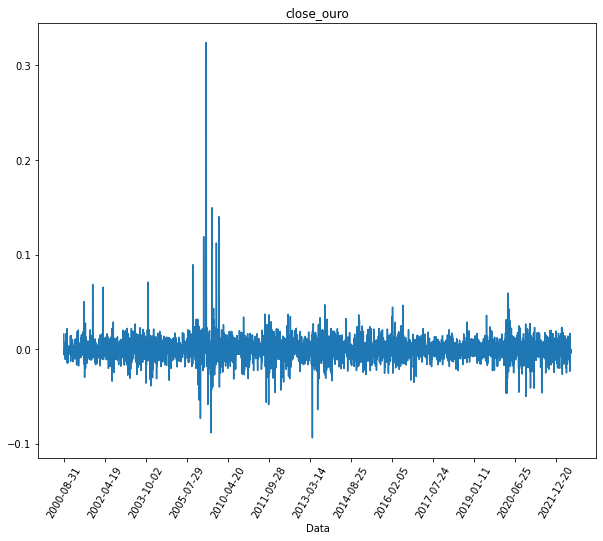

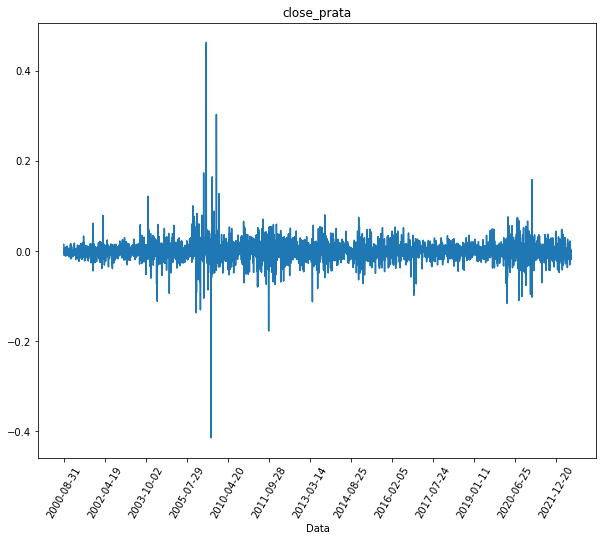

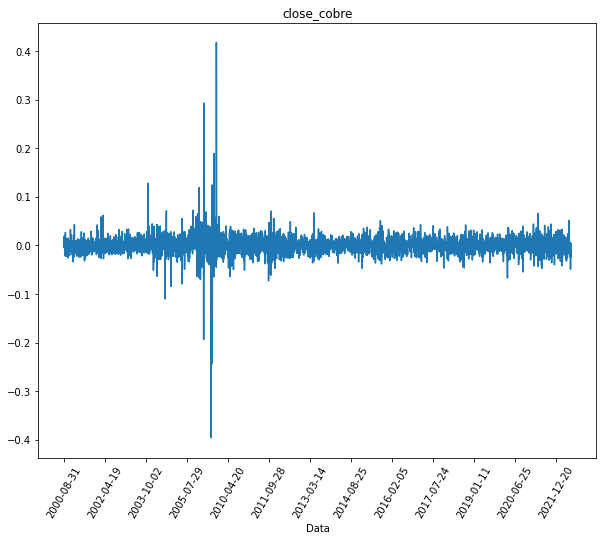

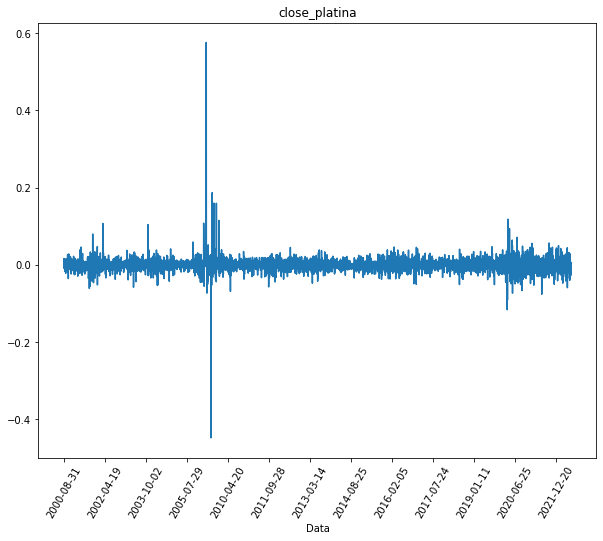

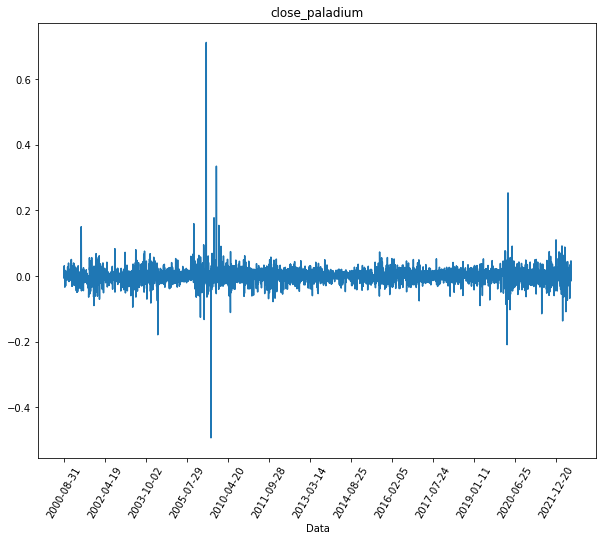

In [ ]:
#Gerando uma tabela vazia
df = pd.DataFrame()

for col in df6. columns:
  # Pulando a coluna date
  if col == 'Date':
    continue
  #
  config = {"ylabel": "",
         "xlabel": "Data",
         "title": col,
         "timeInterval": 365, # Dizer se quer que imprima as datas a cada 30 dias, 365 dias ...
          "saveName": col+'GraphicRetorn'
          }
  # Calculando o retorno
  df['simp_return'] = df6[col].pct_change()
  df['Date'] = df6['Date']
  # Gerando o retorno
  showGraphicOne(plt, df.dropna(), config, 'simp_return')



# Normalizando os dados para comparação dois a dois

In [ ]:
''' Normalizando '''
df = df6.drop(columns=['Date']) 
def minmax_norm(df_input):
    ''' Coloando dentro do intervalo [1,-1] '''
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())

df_minmax_norm = minmax_norm(df)
df_minmax_norm['Date'] = df6['Date']
df_norm = df_minmax_norm
df_norm

,close_ouro,close_prata,close_cobre,close_platina,close_paladium,Date
0,0.010465,0.020288,0.064971,0.097302,0.198297,2000-08-30
1,0.012915,0.021926,0.064971,0.094746,0.200307,2000-08-31
2,0.012191,0.021949,0.065896,0.099423,0.203109,2000-09-01
3,0.011523,0.021814,0.069827,0.102687,0.201681,2000-09-05
4,0.010632,0.021478,0.068786,0.108017,0.207797,2000-09-06
...,...,...,...,...,...,...
4509,0.874749,0.383545,0.729711,0.267595,0.598153,2022-06-24
4510,0.871632,0.384510,0.734104,0.267812,0.599986,2022-06-27
4511,0.869739,0.376386,0.735260,0.270913,0.600973,2022-06-28
4512,0.867624,0.373491,0.734104,0.271021,0.631358,2022-06-29


In [ ]:
## Função para exibir um gráfico scatter para exemplificar a correlação
def showGraphicTwo(plt, df, config, column1, column2):
  ''' Setando a dimensão '''
  plt.figure(figsize=(10,8))
  ''' Nome nos eixos '''
  if config['xlabel']:
    plt.xlabel(config['xlabel'])
  if config['ylabel']:
    plt.ylabel(config['ylabel'])
  ''' Plotando os gráficos '''
  plt.scatter(list(df[column2]), list(df[column1]))
  plt.title(config['title'])
  ''' Imprimindo  '''
  plt.savefig(config['saveName']+'.png')
#plt.plot(converted, list(df6['Fechamento_ouro']), label= 'Ouro')
#plt.legend() 
#plt.plot(X, y, color='r', label='sin') 
#plt.plot(X, z, color='g', label='cos')

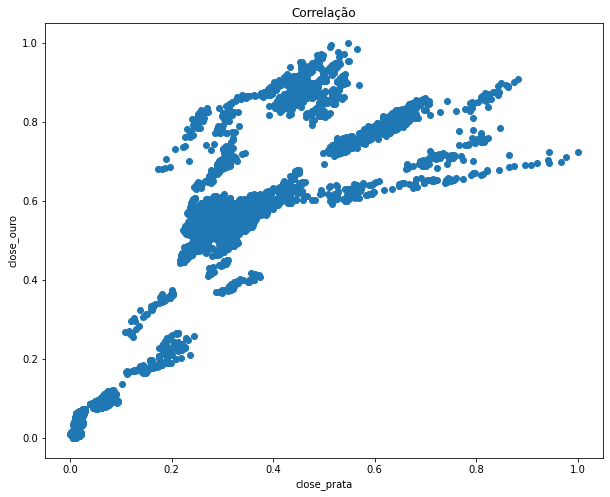

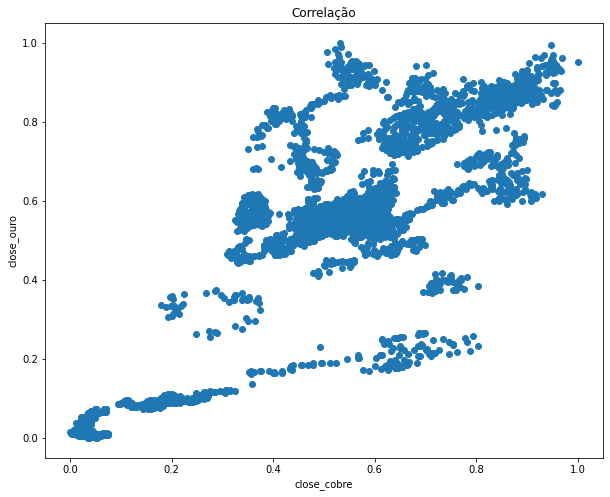

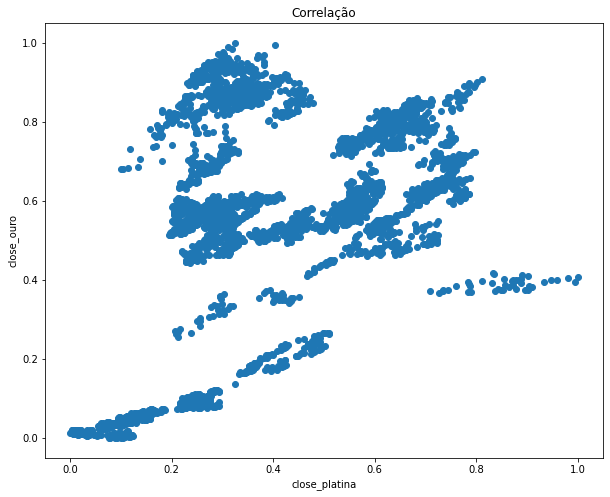

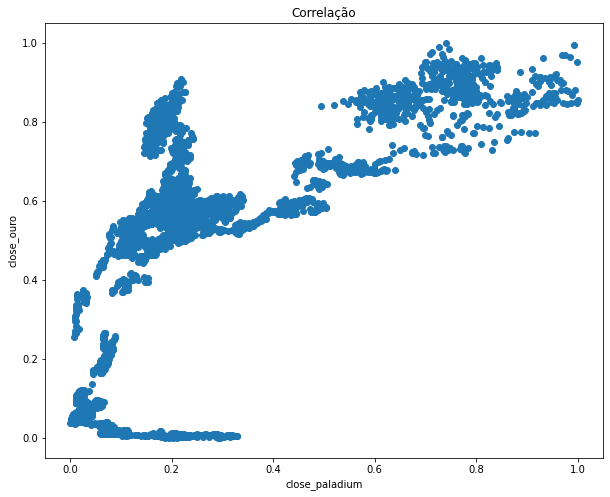

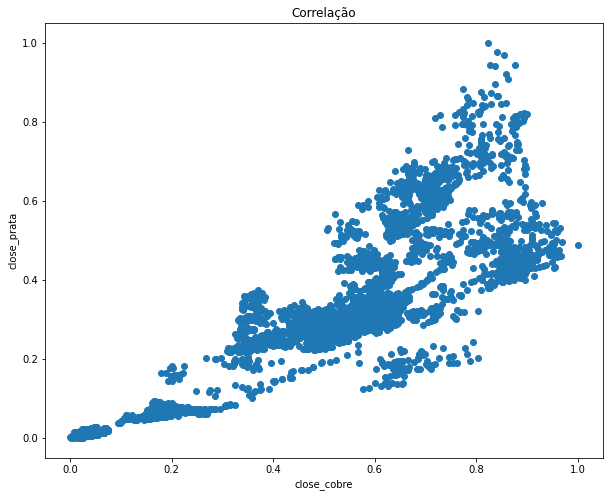

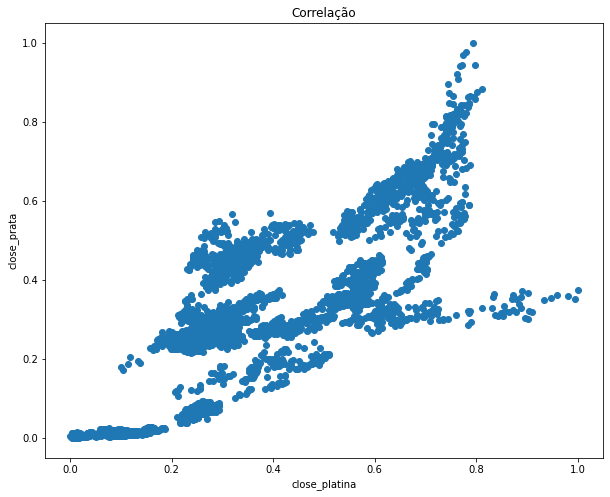

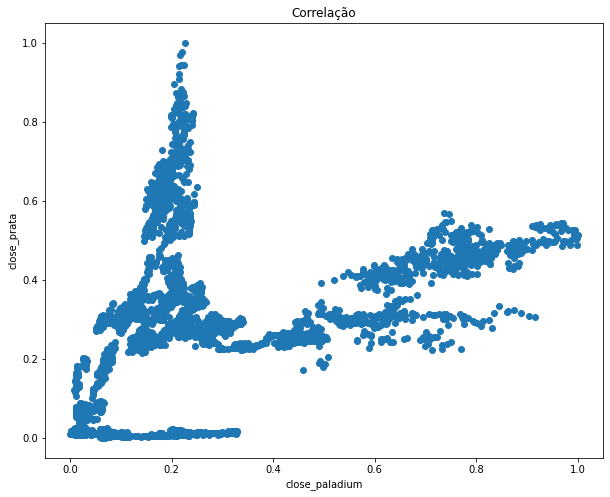

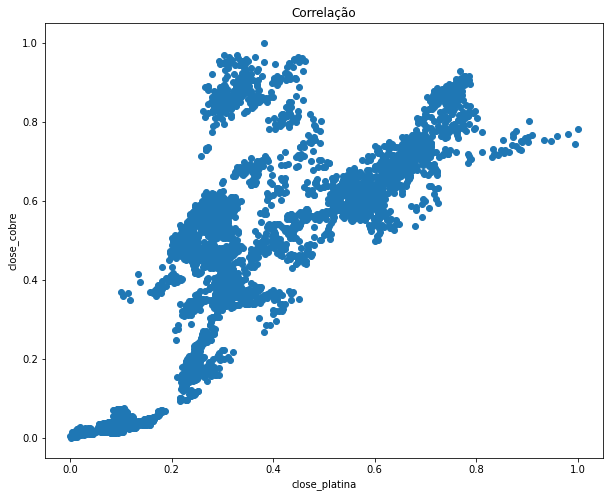

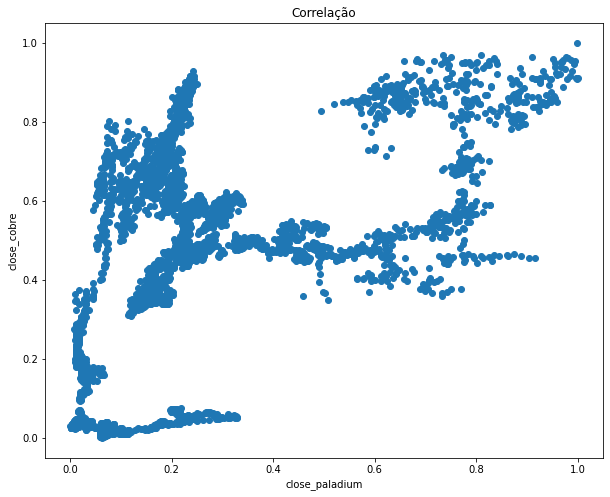

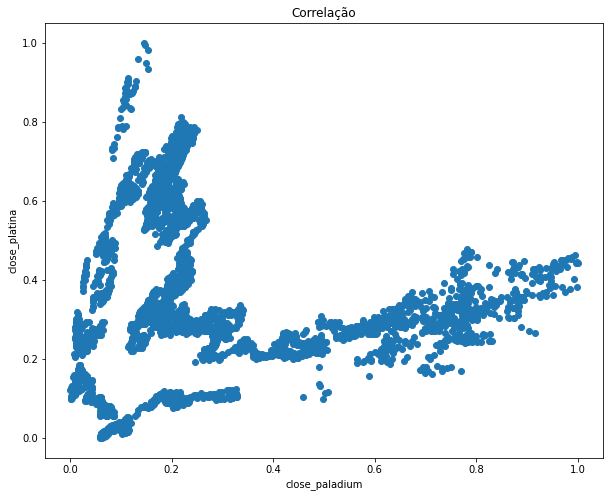

In [ ]:
x = list(df_norm.columns)
x.remove('Date')
y = list(x)

for i in range(0, len(x) -1):
  for j in range(i+1, len(y)):
    config = {"ylabel": x[i],
         "xlabel": y[j],
         "title": 'Correlação',
          "saveName": x[i]+'Scatter'+y[j]
          }
    showGraphicTwo(plt, df_norm, config, x[i], y[j])

# Links para auxiliar

https://medium.com/turing-talks/an%C3%A1lise-de-uma-a%C3%A7%C3%A3o-em-python-b8114bce2fc

https://pt.linkedin.com/pulse/aplica%C3%A7%C3%A3o-de-python-para-finan%C3%A7as-risco-e-retorno-arthur-franco